In [1]:
from Data_Enrichment import get_features

RAW_DIR = "data/raw"
df_feats, feature_cols = get_features(RAW_DIR)
df_feats = df_feats[(df_feats['season_end_year'] != 2025) & (df_feats['season_end_year'] != 2026)]

/workspaces/Machine-learning/Data_Enrichment.py:232: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["ballon_dor_winner"] = df["ballon_dor_winner"].fillna(False).astype(bool)


In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

In [3]:
df = df_feats[[
    'goals',
    'assists',
    'penalty_goals',
    'yellow_cards',
    'direct_red_cards',
    'minutes_played',
    'height',
    'g_per90',
    'a_per90',
    'pen_share',
    'discipline_rate',
    'clean_sheet_rate'
]]



In [4]:
a = df.select_dtypes(include=np.number)
a.head()

,goals,assists,penalty_goals,yellow_cards,direct_red_cards,minutes_played,height,g_per90,a_per90,pen_share,discipline_rate,clean_sheet_rate
0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0,0,0,0,0.0,195.0,0.0,0.0,0.0,0.0,0.0
8,0.0,1,0,3,0,0.0,187.0,0.0,0.0,0.0,0.5,0.0
9,0.0,1,0,1,0,0.0,187.0,0.0,0.0,0.0,0.5,0.0


In [5]:
from sklearn.preprocessing import StandardScaler
# Standardize the features
scaler = StandardScaler() #Z score
X1 = scaler.fit_transform(a)

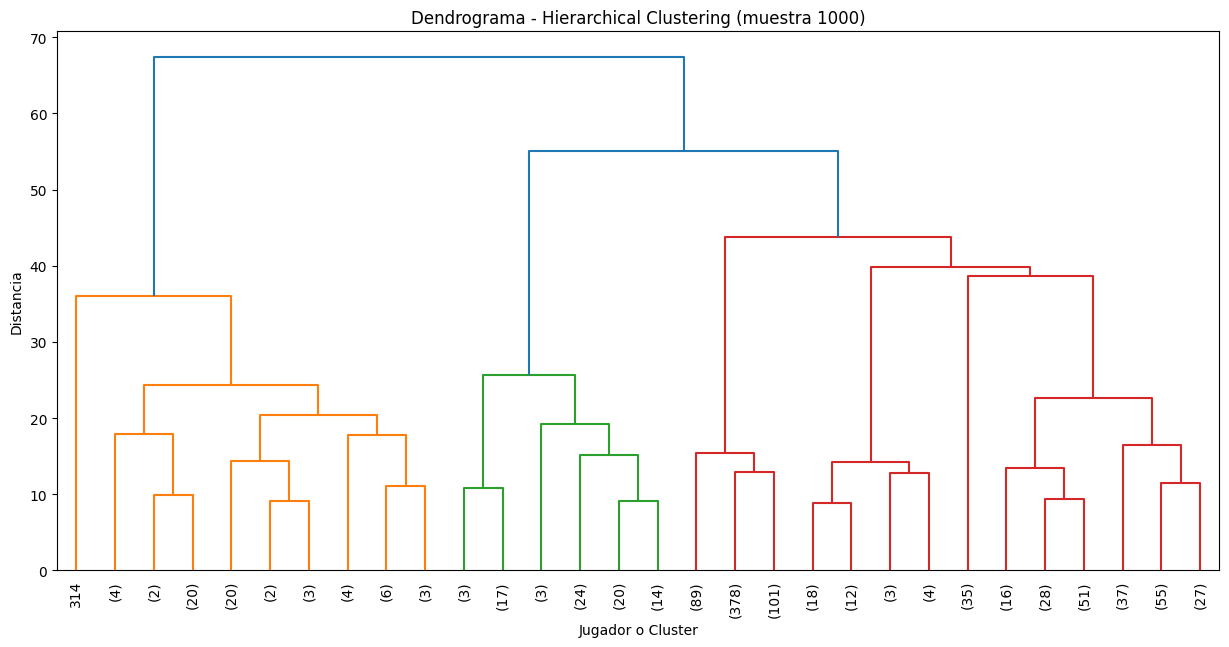

                  goals   assists  penalty_goals  own_goals  yellow_cards  \
hier_cluster                                                                
1             12.415385  6.876923       1.876923   0.030769      4.230769   
2              0.000000  0.061728       0.000000   0.000000      0.777778   
3              0.320423  0.369718       0.017606   0.000000      0.859155   
4              2.356643  2.342657       0.045455   0.146853      4.527972   

              direct_red_cards  minutes_played   g_per90   a_per90  gc_per90  \
hier_cluster                                                                   
1                     0.076923      313.876923  5.133999  2.175832  0.000000   
2                     0.000000     1423.296296  0.000000  0.003024  1.578047   
3                     0.000000       97.401408  0.091694  0.024637  0.000000   
4                     0.136364      925.356643  0.498008  0.308462  0.000000   

              clean_sheet_rate  
hier_cluster           

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

# --- 1. Selecciona las features numéricas más relevantes ---
selected_features = [
    'goals', 'assists', 'penalty_goals', 'own_goals',
    'yellow_cards', 'direct_red_cards', 'minutes_played',
    'g_per90', 'a_per90', 'gc_per90', 'clean_sheet_rate'
]

# --- 2. Toma una muestra reducida ---
sample_df = df_feats[selected_features].fillna(0).sample(1000, random_state=42)

# --- 3. Escala las features ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(sample_df)

# --- 4. Aplica linkage (método jerárquico) ---
Z = linkage(X_scaled, method='ward')

# --- 5. Grafica dendrograma ---
plt.figure(figsize=(15, 7))
dendrogram(
    Z,
    leaf_rotation=90.,       # rota los nombres de los leaves
    leaf_font_size=10.,
    truncate_mode='lastp',   # muestra solo los últimos p clusters
    p=30                     # ajusta cuántos leaves se muestran
)
plt.title('Dendrograma - Hierarchical Clustering (muestra 1000)')
plt.xlabel('Jugador o Cluster')
plt.ylabel('Distancia')
plt.show()

# --- 6. Asignar clusters ---
# Para la muestra, por ejemplo, 4 clusters
clusters = fcluster(Z, t=4, criterion='maxclust')
sample_df['hier_cluster'] = clusters

# --- 7. Revisar promedios por cluster ---
cluster_summary = sample_df.groupby('hier_cluster')[selected_features].mean()
print(cluster_summary)
